In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
working_dir = f'/projects/eb7fd651-8ca7-45f4-8470-34087f434ad6/Code/Final_Build/0_deg/25_0/prediction_model'

raw_profiles_path = f"{working_dir}/training_raw_profiles.npy"
oot_profile_path = f"{working_dir}/training_oot_noise_profile.npy"
oot_sub_profiles_path = f"{working_dir}/training_oot_sub_profiles.npy"
coordinates_path = f"{working_dir}/training_coordinates.npy"

raw_profiles = np.load(raw_profiles_path)
oot_profile = np.load(oot_profile_path)
oot_sub_profiles = np.load(oot_sub_profiles_path)
coordinates = np.load(coordinates_path)

In [4]:
print(np.shape(raw_profiles))
print(np.shape(oot_sub_profiles))
print(np.shape(coordinates))

(1500, 401)
(1500, 401)
(1500, 2)


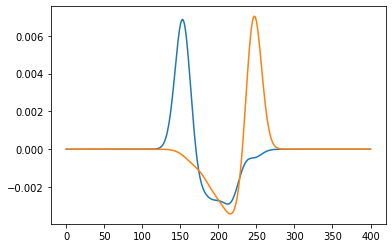

In [14]:
# Find the indices that would sort the coordinates based on the x-values
sorted_indices = np.argsort(coordinates[:, 0])

# Rearrange the profiles and coordinates based on the sorted indices
sorted_profiles = oot_sub_profiles[sorted_indices]

plt.plot(sorted_profiles[0])
plt.plot(sorted_profiles[1499])
plt.show()

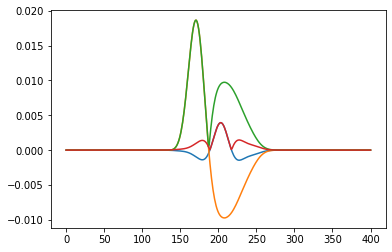

In [38]:
# Find the maximum amplitude for each profile
max_amplitudes = np.max(oot_sub_profiles, axis=1)

# Sort the results from least to greatest amplitude
sorted_indices_2 = np.argsort(max_amplitudes)
sorted_profiles_2 = oot_sub_profiles[sorted_indices_2]
sorted_profiles_3 = abs(oot_sub_profiles[sorted_indices_2])
sorted_profiles_3 = sorted_profiles_3[::-1]

plt.plot(sorted_profiles_2[0])
plt.plot(sorted_profiles_2[1499])
plt.plot(sorted_profiles_3[0])
plt.plot(sorted_profiles_3[1499])
plt.show()

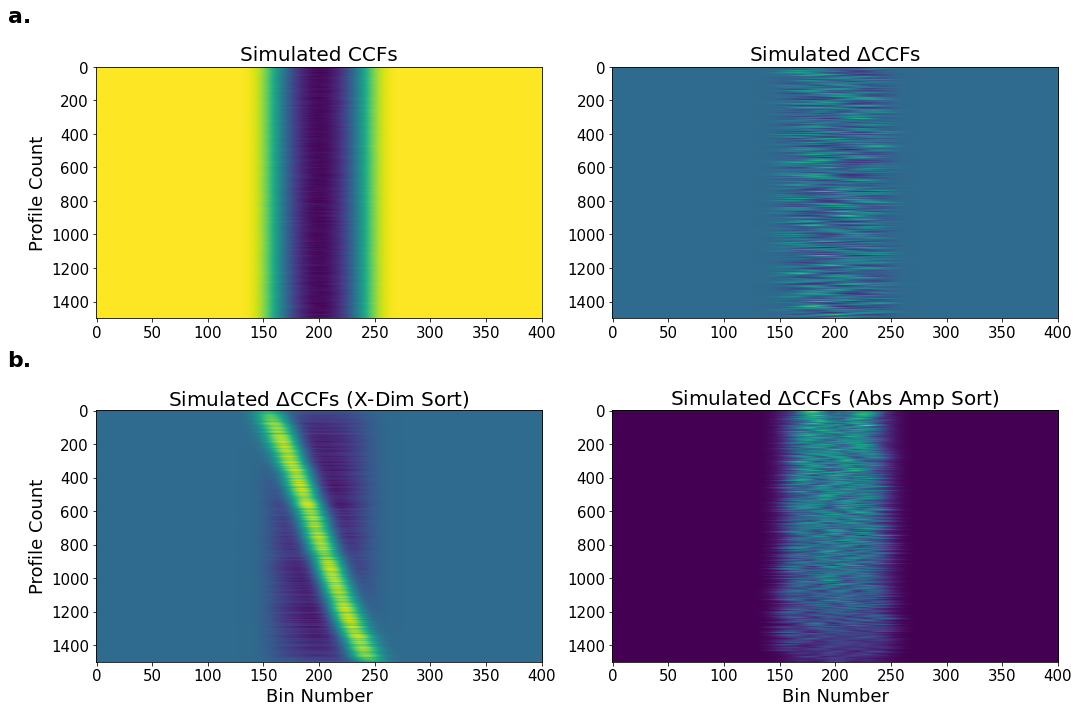

In [39]:
# Create a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

labelsize=18
ticksize=15
titlesize=20
labelsize=18
notesize=22

# Plotting the first row
# Plot 1: Profiles Heatmap
axs[0, 0].imshow(raw_profiles, cmap='viridis', aspect='auto')
axs[0, 0].set_title('Simulated CCFs', fontsize=titlesize)
#axs[0, 0].set_xlabel('n', fontsize=labelsize)
axs[0, 0].set_ylabel('Profile Count', fontsize=labelsize)
axs[0, 0].tick_params(axis='both', which='major', labelsize=ticksize)
axs[0, 0].grid(False)

# Plot 2: Residuals Heatmap
axs[0, 1].imshow(oot_sub_profiles, cmap='viridis', aspect='auto')
axs[0, 1].set_title('Simulated $\Delta$CCFs', fontsize=titlesize)
#axs[0, 1].set_xlabel('n', fontsize=labelsize)
#axs[0, 1].set_ylabel('p', fontsize=labelsize)
axs[0, 1].tick_params(axis='both', which='major', labelsize=ticksize)
axs[0, 1].grid(False)

# Plotting the second row
# Plot 3: Residuals Heatmap (X-Dim)
axs[1, 0].imshow(sorted_profiles, cmap='viridis', aspect='auto')
axs[1, 0].set_title('Simulated $\Delta$CCFs (X-Dim Sort)', fontsize=titlesize)
axs[1, 0].set_xlabel('Bin Number', fontsize=labelsize)
axs[1, 0].set_ylabel('Profile Count', fontsize=labelsize)
axs[1, 0].tick_params(axis='both', which='major', labelsize=ticksize)
axs[1, 0].grid(False)

# Plot 4: Residuals Heatmap (Abs Amp)
axs[1, 1].imshow(sorted_profiles_3, cmap='viridis', aspect='auto')
axs[1, 1].set_title('Simulated $\Delta$CCFs (Abs Amp Sort)', fontsize=titlesize)
axs[1, 1].set_xlabel('Bin Number', fontsize=labelsize)
#axs[1, 1].set_ylabel('p', fontsize=labelsize)
axs[1, 1].tick_params(axis='both', which='major', labelsize=ticksize)
axs[1, 1].grid(False)

# Add labels 'a.' and 'b.' to the first row and second row, respectively
axs[0, 0].annotate('a.', xy=(-.1, 1.2), xytext=(-20, 10), xycoords='axes fraction', textcoords='offset points', ha='right', va='top', fontsize=notesize, fontweight='bold')
axs[1, 0].annotate('b.', xy=(-.1, 1.2), xytext=(-20, 10), xycoords='axes fraction', textcoords='offset points', ha='right', va='top', fontsize=notesize, fontweight='bold')

plt.tight_layout()

# Save the figure as a PDF
plt.savefig('Heatmaps.pdf')

plt.show()
